# NBA Sports Betting Analysis: How accurate are betting odds for NBA games?
GitHub Repo: https://github.com/ihern/418-Project.git 

UIC CS 418, Spring 2024

Group 12: 
- **Ronak Chaudhuri**, rchau5@uic.edu, RonakChaudhuri
- **Isaias Hernandez**, iherna50@uic.edu, ihern
- **Kevin Pereira**, kperei2@uic.edu, kperei2
- **Brandon Rosero**, broser2@uic.edu, brandon-rosero
- **Muhammad Sharif**, mhari8@uic.edu, msharitenn 

# Introduction
Changes Since Proposal: None

### Data

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import csv


In [2]:
# input_csv_path = 'NBA_2021_2022_Bet_Outcomes.csv'
# output_csv_path = 'NBA_2021_2022_bet_outcomes_corrected_dates.csv'

# def correct_month(month):
#     if month > 50:
#         return month - 50
#     elif month > 40:
#         return month - 40
#     elif month > 30:
#         return month - 30
#     return month

# def correct_day(month, day):

#     month_days = {1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30, 
#                   7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31}
    
#     if day == 0 or day > month_days.get(month, 31):
#         return 1
#     return day

# def correct_date(mmdd):
#     month = int(mmdd[:2])
#     day = int(mmdd[2:])
#     month = correct_month(month)  
#     day = correct_day(month, day)  
   
#     year = '2021' if month >= 10 else '2022'
#     return f"{month:02d}/{day:02d}/{year}"

# with open(input_csv_path, mode='r', newline='') as infile, open(output_csv_path, mode='w', newline='') as outfile:
#     reader = csv.reader(infile)
#     writer = csv.writer(outfile)
    
#     header = next(reader)
#     writer.writerow(header)
    
#     for row in reader:
#         row[0] = correct_date(row[0]) 
#         writer.writerow(row)


player_stats = pd.read_csv('2021-22_NBA_Player_Stats_ Per Game.csv')
bet_outcomes = pd.read_csv('NBA_2021_2022_bet_outcomes_corrected_dates.csv')
player_streaks = pd.read_csv('Player_Streak_Stats.csv')

# player_stats.head()
# bet_outcomes.head(2500)
# player_streaks.head()

In [3]:
teamname_mapping = {
    'HOU': 'Houston',
    'OKC': 'OklahomaCity',
    'DAL': 'Dallas',
    'BOS': 'Boston',
    'WAS': 'Washington',
    'LAL': 'LALakers',
    'MIA': 'Miami',
    'POR': 'Portland',
    'PHI': 'Philadelphia',
    'NYK': 'NewYork',
    'LAC': 'LAClippers',
    'GSW': 'GoldenState',
    'MIL': 'Milwaukee',
    'BRK': 'Brooklyn',
    'DEN': 'Denver',
    'NOP': 'NewOrleans',
    'PHO': 'Phoenix',
    'MEM': 'Memphis',
    'TOR': 'Toronto',
    'SAC': 'Sacramento',
    'CHI': 'Chicago',
    'CLE': 'Cleveland',
    'MIN': 'Minnesota',
    'UTA': 'Utah',
    'ATL': 'Atlanta',
    'IND': 'Indiana',
    'CHO': 'Charlotte', 
    'DET': 'Detroit',
    'SAS': 'SanAntonio',  
    'CHA': 'Charlotte', 
    'ORL': 'Orlando',
}

def convert_teamname(team):
    if pd.isna(team) or ',' in team:
        return None
    else:
        return teamname_mapping.get(team, None)

player_streaks['Mapped Team'] = player_streaks['Team'].apply(convert_teamname)
player_streaks_clean = player_streaks.dropna(subset=['Mapped Team'])

bet_outcomes['Date'] = pd.to_datetime(bet_outcomes['Date'], dayfirst=True)

bet_outcomes['Mapped Team'] = bet_outcomes['Team'].map(teamname_mapping).fillna(bet_outcomes['Team'])

bet_outcomes_simplified = bet_outcomes[['Date', 'Mapped Team', 'Final', 'ML']]
player_streaks_simplified = player_streaks_clean[['Player', 'Mapped Team', 'Streak Started', 'Streak Ended']]

streaks_with_bets = pd.DataFrame()
data_to_append = []

for index, streak in player_streaks_simplified.iterrows():
    matching_bets = bet_outcomes_simplified[
        (bet_outcomes_simplified['Mapped Team'] == streak['Mapped Team']) &
        (bet_outcomes_simplified['Date'] >= streak['Streak Started']) &
        (bet_outcomes_simplified['Date'] <= streak['Streak Ended'])
    ]
    for _, bet in matching_bets.iterrows():
        data_to_append.append({
            'Player': streak['Player'],
            'Team': streak['Mapped Team'],
            'Streak Started': streak['Streak Started'],
            'Streak Ended': streak['Streak Ended'],
            'Bet Date': bet['Date'],
            'Final Score': bet['Final'],
            'Money Line': bet['ML']
        })

streaks_with_bets = pd.DataFrame(data_to_append)


print("\nbet Outcomes Date Range:")
print(bet_outcomes['Date'].min(), "to", bet_outcomes['Date'].max())
print("\nunique Teams in Bet Outcomes:")
print(bet_outcomes['Team'].unique())
print("\nunique Teams in Player Streaks:")
print(player_streaks['Team'].unique())
print("\nplayer_streaks date range:")
print(player_streaks[['Player','Streak Started', 'Streak Ended']].head())




bet Outcomes Date Range:
2021-10-01 00:00:00 to 2022-03-01 00:00:00

unique Teams in Bet Outcomes:
['Brooklyn' 'Milwaukee' 'GoldenState' 'LALakers' 'Indiana' 'Charlotte'
 'Chicago' 'Detroit' 'Washington' 'Toronto' 'Boston' 'NewYork' 'Cleveland'
 'Memphis' 'Philadelphia' 'NewOrleans' 'Houston' 'Minnesota' 'Orlando'
 'SanAntonio' 'OklahomaCity' 'Utah' 'Sacramento' 'Portland' 'Denver'
 'Phoenix' 'Dallas' 'Atlanta' 'Miami' 'LAClippers' 'Golden State']

unique Teams in Player Streaks:
['CHI' 'PHI' 'MEM' 'LAL' 'DEN' 'HOU' 'DAL' 'MIL' 'BOS' 'TOR' 'BRK' 'ATL'
 'UTA' 'GSW' 'PHO' 'OKC' 'SAC' 'NOP' 'POR' 'MIN' 'LAC' 'NYK' 'SAS' 'CHO'
 'CLE' 'WAS' 'IND' 'DET' 'MIA']

player_streaks date range:
          Player Streak Started Streak Ended
0  DeMar DeRozan     2022-02-04   2022-02-26
1    Joel Embiid     2021-12-26   2022-01-12
2      Ja Morant     2022-01-19   2022-01-31
3   LeBron James     2021-12-19   2021-12-31
4    Joel Embiid     2022-01-15   2022-01-25


C:\Users\mAs-\AppData\Local\Temp\ipykernel_2128\57099352.py:44: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  bet_outcomes['Date'] = pd.to_datetime(bet_outcomes['Date'], dayfirst=True)


# Visualizations


Index(['Player', 'Team', 'Streak Started', 'Streak Ended', 'Bet Date',
       'Final Score', 'Money Line', 'Streak Length'],
      dtype='object')


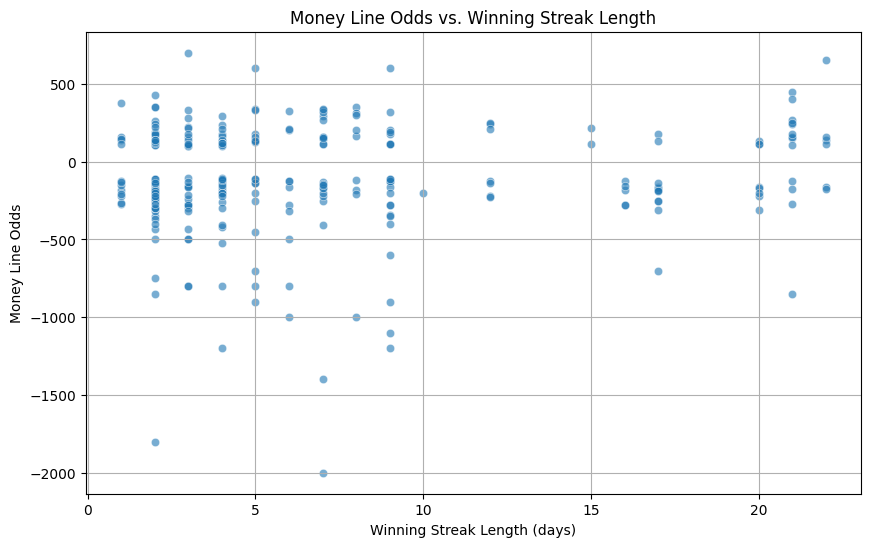

In [4]:
streaks_with_bets['Streak Started'] = pd.to_datetime(streaks_with_bets['Streak Started'])
streaks_with_bets['Streak Ended'] = pd.to_datetime(streaks_with_bets['Streak Ended'])

streaks_with_bets['Streak Length'] = (streaks_with_bets['Streak Ended'] - streaks_with_bets['Streak Started']).dt.days

print(streaks_with_bets.columns)

streaks_with_bets['Money Line'] = pd.to_numeric(streaks_with_bets['Money Line'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Streak Length', y='Money Line', data=streaks_with_bets, alpha=0.6, edgecolor='w')

plt.title('Money Line Odds vs. Winning Streak Length')
plt.xlabel('Winning Streak Length (days)')
plt.ylabel('Money Line Odds')
plt.grid(True)
plt.show()

The chart visualizes the longest winning streaks of basketball players and it relations with moneyline odds. it show the player with more win streak will often mean higher money line odds

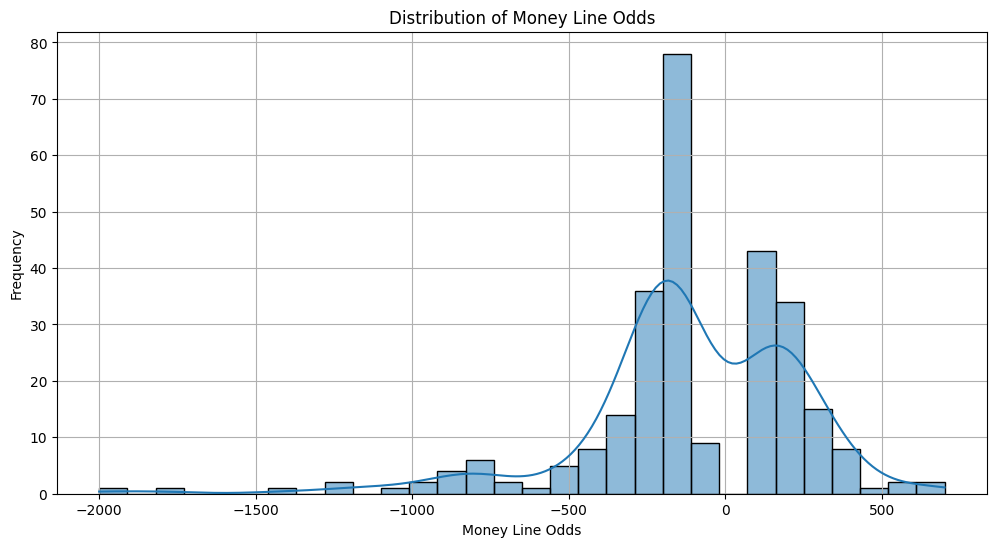

In [5]:
# Distribution of Money Line Odds
plt.figure(figsize=(12, 6))
sns.histplot(streaks_with_bets['Money Line'], bins=30, kde=True)
plt.title('Distribution of Money Line Odds')
plt.xlabel('Money Line Odds')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

To visualize how the money line odds are distributed across the dataset, helping to understand the commonality and range of odds offered. this chart provides a detailed look at the odds' spread, highlighting the most common odds given

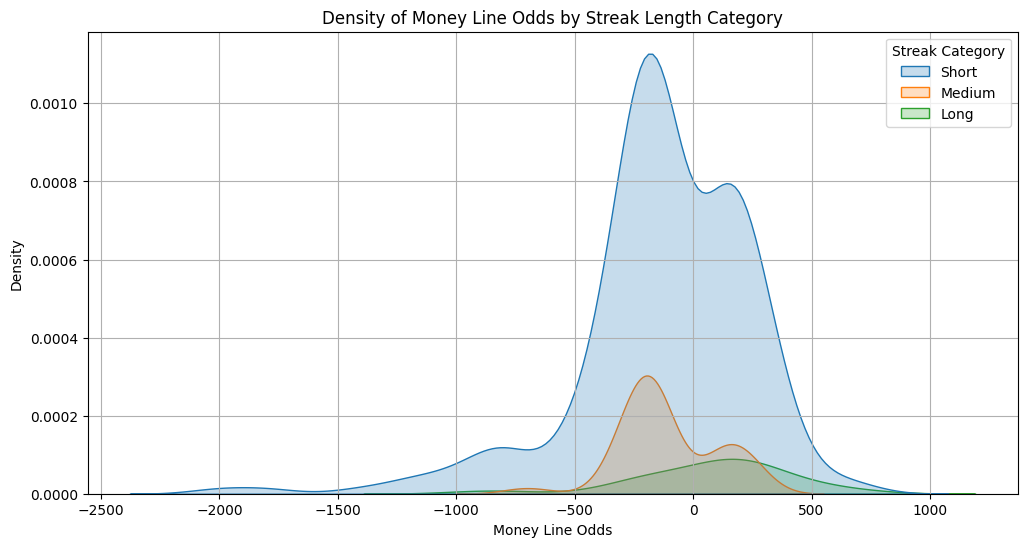

In [6]:
#  Density Plot of Money Line Odds for Different Streak Lengths
streaks_with_bets['Streak Category'] = pd.cut(streaks_with_bets['Streak Length'], bins=[0, 10, 20, float('inf')], labels=['Short', 'Medium', 'Long'])

plt.figure(figsize=(12, 6))
sns.kdeplot(data=streaks_with_bets, x='Money Line', hue='Streak Category', fill=True)
plt.title('Density of Money Line Odds by Streak Length Category')
plt.xlabel('Money Line Odds')
plt.ylabel('Density')
plt.grid(True)
plt.show()

 this density plot offers insights into how the distribution of money line odds varies with different lengths of winning streaks, any trends or patterns that may exist between the streaks and the odds offered by bookmakers
 

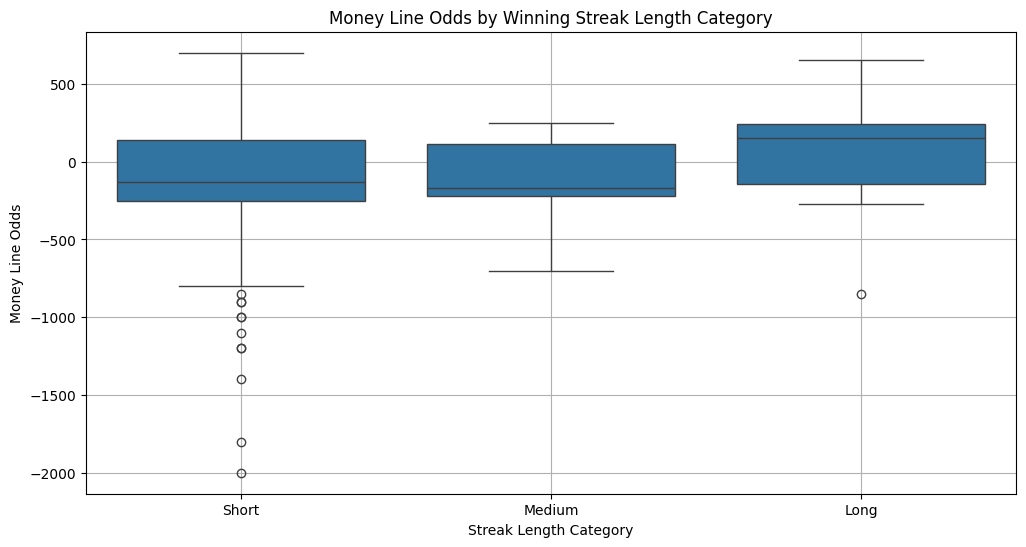

In [7]:
# Boxplot of Money Line Odds by Streak Length Categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Streak Category', y='Money Line', data=streaks_with_bets)
plt.title('Money Line Odds by Winning Streak Length Category')
plt.xlabel('Streak Length Category')
plt.ylabel('Money Line Odds')
plt.grid(True)
plt.show()


this boxplot is an effective in visually assessing the relationship between the length of winning streaks and the corresponding money line odds, showing differences in variance, median, and outliers within each category

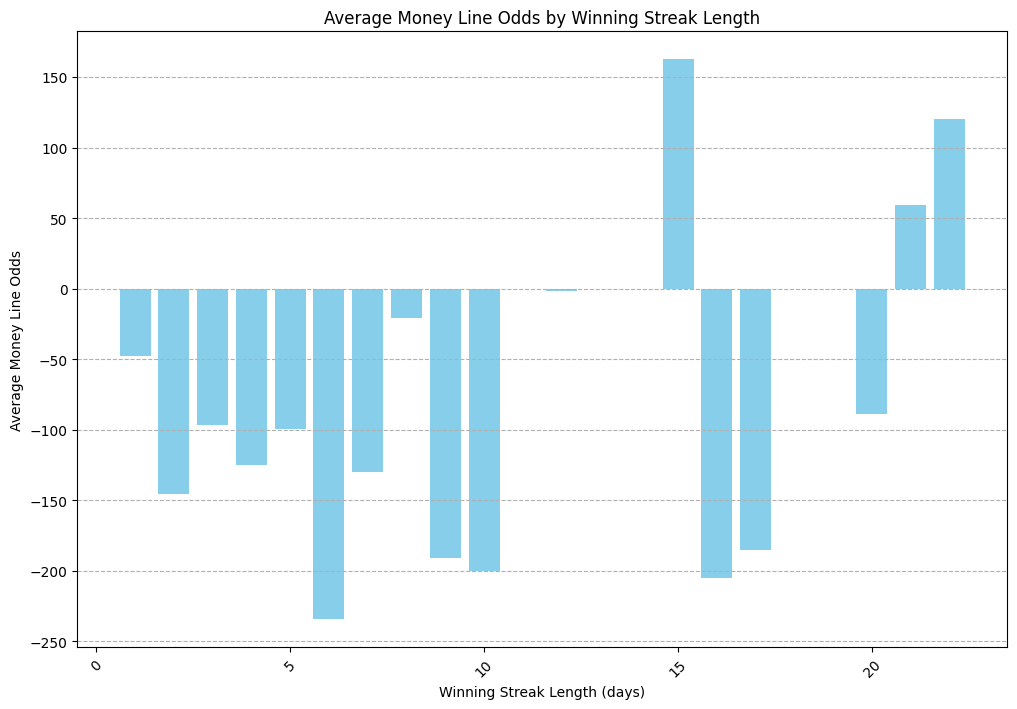

In [8]:
average_money_line_by_streak = streaks_with_bets.groupby('Streak Length')['Money Line'].mean().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(average_money_line_by_streak['Streak Length'], average_money_line_by_streak['Money Line'], color='skyblue')

plt.title('Average Money Line Odds by Winning Streak Length')
plt.xlabel('Winning Streak Length (days)')
plt.ylabel('Average Money Line Odds')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()


this bar chart show a clear and detailed comparison of how the average money line odds differs with different winning streak lengths. it highlights trends or patterns in the betting odds as streaks extend over time. this does show very little effect of individual player on a win streak

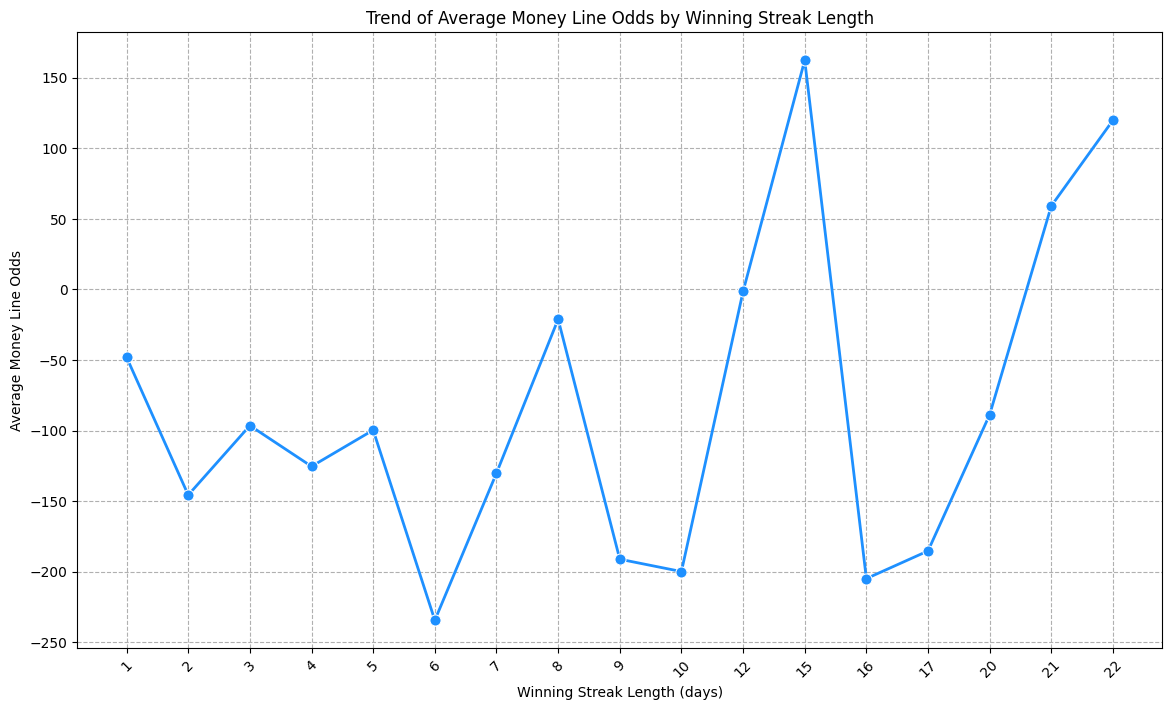

In [9]:
average_money = streaks_with_bets.groupby('Streak Length')['Money Line'].mean().reset_index()

average_money['Streak Length'] = average_money['Streak Length'].astype(str)

plt.figure(figsize=(14, 8))
sns.lineplot(x='Streak Length', y='Money Line', data=average_money,
             marker='o', markersize=8, color='dodgerblue', linewidth=2)

plt.title('Trend of Average Money Line Odds by Winning Streak Length')
plt.xlabel('Winning Streak Length (days)')
plt.ylabel('Average Money Line Odds')
plt.grid(True, which='both', linestyle='--')
plt.xticks(rotation=45)

plt.show()

this chart provides a clear visualization of how the average money line odds evolve with the length of winning streaks. gives valuable insights into the dynamics of betting odds in relation to player performance. this show how player wind streak does effect money line odds

C:\Users\mAs-\AppData\Local\Temp\ipykernel_2128\1308119369.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = streaks_with_bets.pivot_table(index='Streak Length Bin', columns='Money Line Bin', aggfunc='size', fill_value=0)


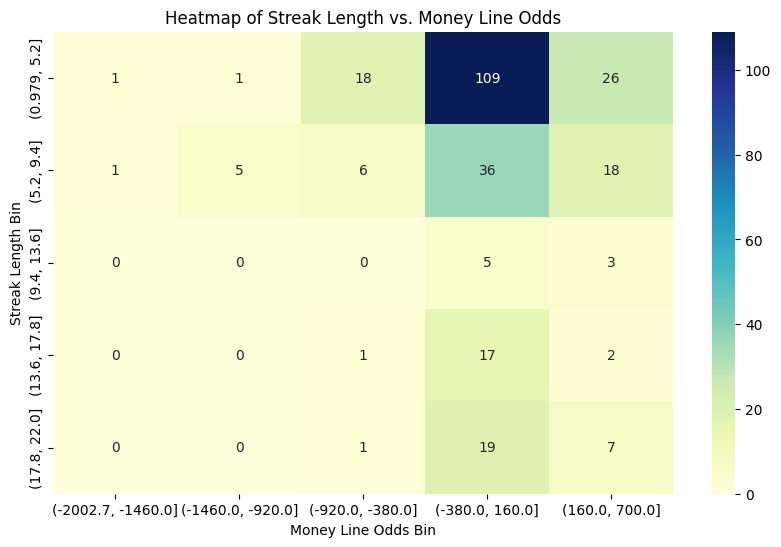

In [10]:
streaks_with_bets['Streak Length Bin'] = pd.cut(streaks_with_bets['Streak Length'], bins=5)
streaks_with_bets['Money Line Bin'] = pd.cut(streaks_with_bets['Money Line'], bins=5)

heatmap_data = streaks_with_bets.pivot_table(index='Streak Length Bin', columns='Money Line Bin', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Heatmap of Streak Length vs. Money Line Odds')
plt.xlabel('Money Line Odds Bin')
plt.ylabel('Streak Length Bin')
plt.show()

This heatmap effectively illustrates the distribution and frequency of combinations between different ranges of winning streak lengths and money line odds, offering insights into which combinations are most common and potentially highlighting trends or patterns in the data, such as preferred odds for certain streak lengths.

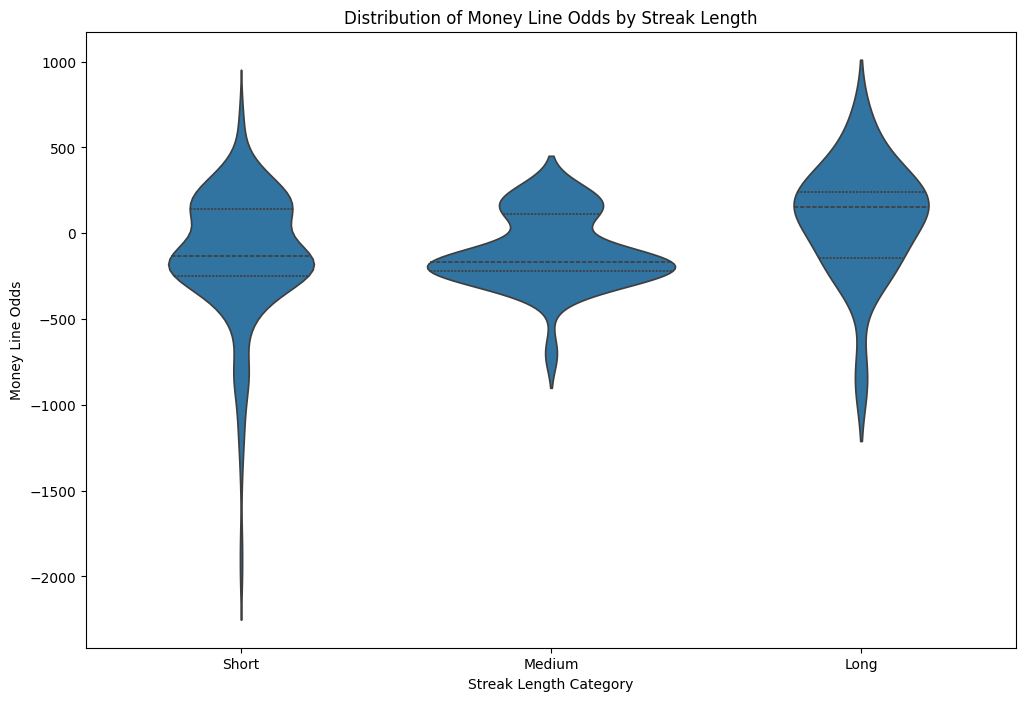

In [11]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Streak Category', y='Money Line', data=streaks_with_bets, inner='quartile')
plt.title('Distribution of Money Line Odds by Streak Length')
plt.xlabel('Streak Length Category')
plt.ylabel('Money Line Odds')
plt.show()


this violin plot offers a comprehensive look at how the distribution of money line odds differs by streak length category, revealing both the central tendency and variability within each category  SHOULD WE REMOVE THIS ONE?

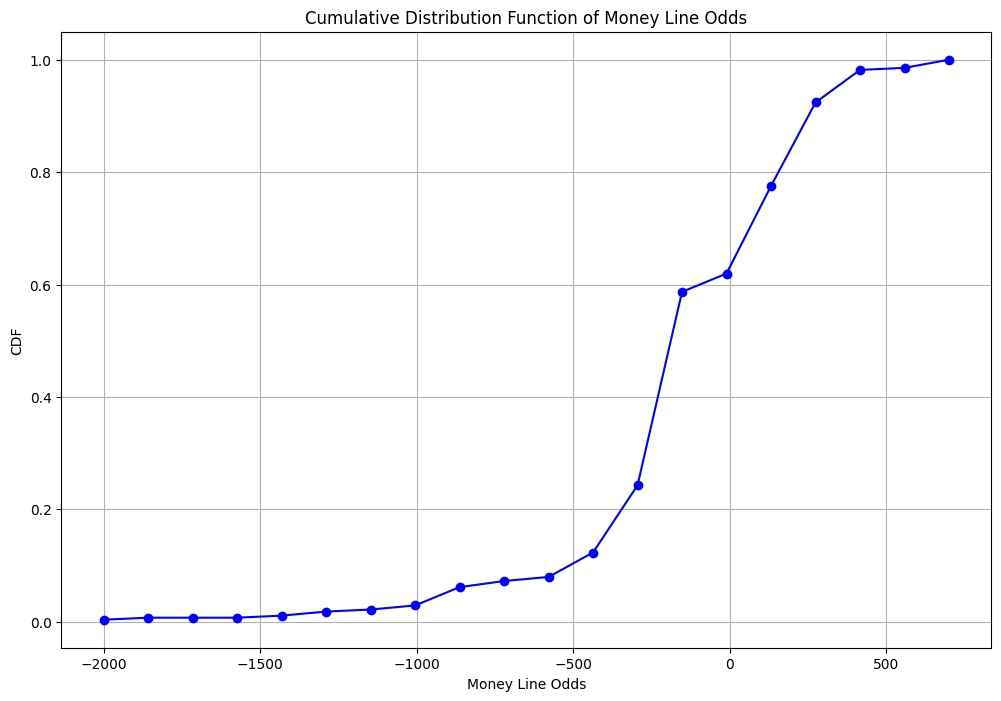

In [12]:
a = streaks_with_bets['Money Line'].dropna()

num_bins = 20
cumfreq_result, _ = np.histogram(a, bins=num_bins)
x = np.linspace(min(a), max(a), num=len(cumfreq_result))

cdf = np.cumsum(cumfreq_result) / np.sum(cumfreq_result)

plt.figure(figsize=(12, 8))
plt.plot(x, cdf, marker='o', linestyle='-', color='blue')
plt.title('Cumulative Distribution Function of Money Line Odds')
plt.xlabel('Money Line Odds')
plt.ylabel('CDF')
plt.grid(True)
plt.show()


this CDF plot offers a visual representation of the distribution of money line odds, making it easy to see the probability of odds falling below a particular value. This can be particularly useful for identifying the odds' range within which the majority of bets are placed and understanding the overall distribution.  REMOVE THIS ONE ?????

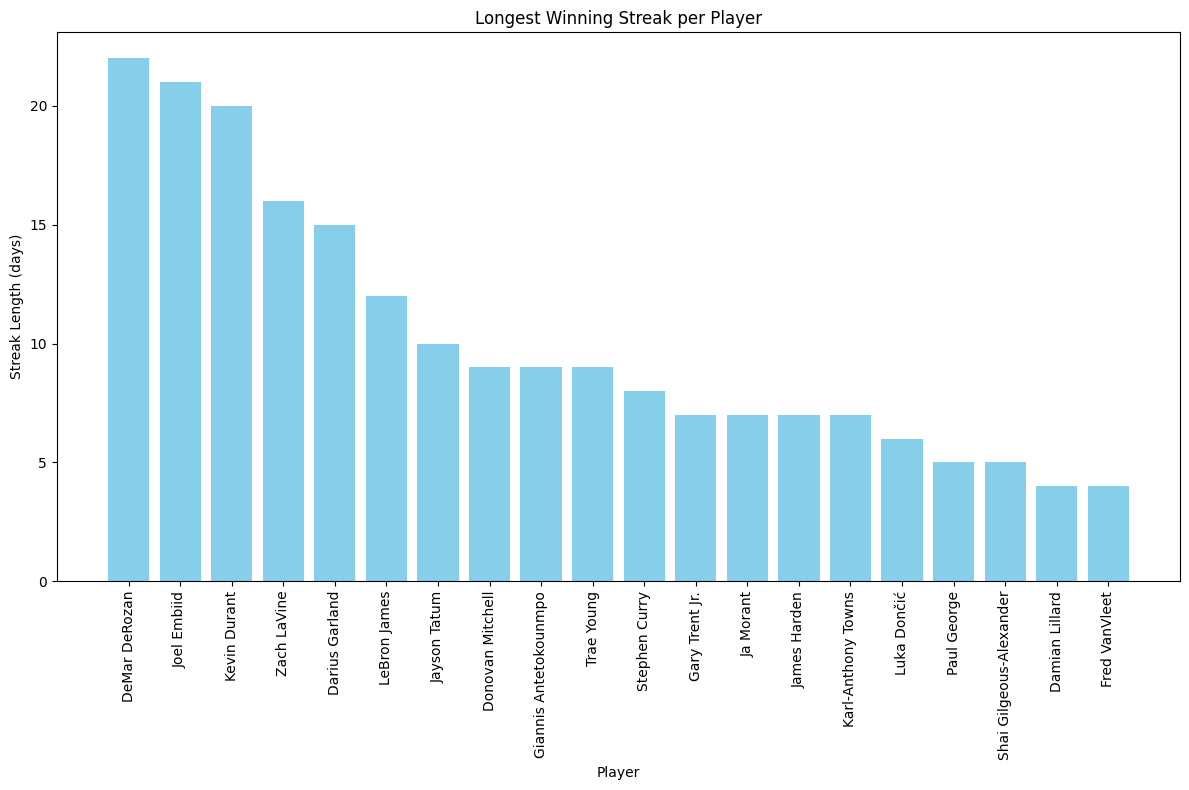

In [13]:
longest_streaks_player = streaks_with_bets.groupby('Player')['Streak Length'].max().reset_index()

plt.figure(figsize=(12, 8))

top_streaks_player = longest_streaks_player.nlargest(20, 'Streak Length')

plt.bar(top_streaks_player['Player'], top_streaks_player['Streak Length'], color='skyblue')
plt.title('Longest Winning Streak per Player')
plt.xlabel('Player')
plt.ylabel('Streak Length (days)')
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

This visualization effectively highlights the players with the most extended periods of success. this is to see if big name are on this list for explotatory reason and to help form questions.

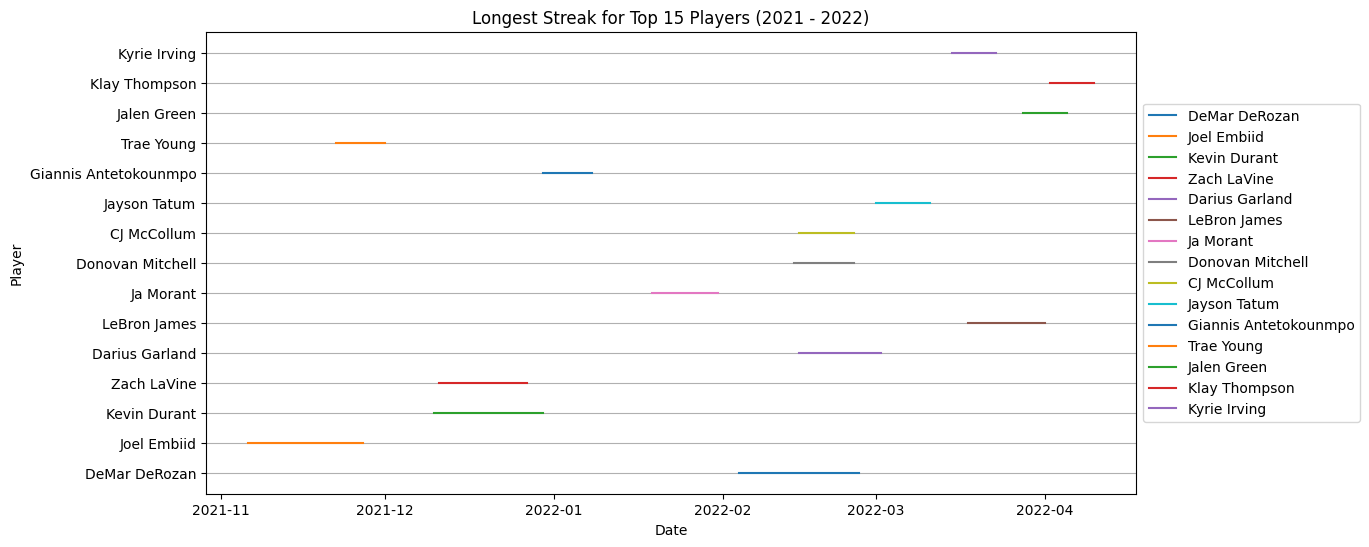

In [14]:
player_streaks['Streak Started'] = pd.to_datetime(player_streaks['Streak Started'])
player_streaks['Streak Ended'] = pd.to_datetime(player_streaks['Streak Ended'])

player_streaks_filtered = player_streaks[(player_streaks['Streak Started'].dt.year >= 2021) & (player_streaks['Streak Ended'].dt.year <= 2022)]


player_streaks_filtered['Streak Duration'] = (player_streaks_filtered['Streak Ended'] - player_streaks_filtered['Streak Started']).dt.days

top_15_players = player_streaks_filtered.groupby('Player')['Streak Duration'].max().nlargest(15).index


plt.figure(figsize=(12, 6))
for player in top_15_players:
    player_data = player_streaks_filtered[player_streaks_filtered['Player'] == player]
    longest_streak = player_data.loc[player_data['Streak Duration'].idxmax()]
    plt.plot([longest_streak['Streak Started'], longest_streak['Streak Ended']], [player, player], label=player)

plt.xlabel('Date')
plt.ylabel('Player')
plt.title('Longest Streak for Top 15 Players (2021 - 2022)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(axis='y')
plt.show()

This visualization effectively highlights the players with the most extended periods of success. this is to see if big name are on this list for explotatory reason and to help form questions.

# Machine Learning Analysis 

# Reflection

Small explanation of some betting concepts:

Money Line Odds: These are used by bookmakers to represent the probability of a particular outcome in a sporting event typically a win by either team or participant. The odds reflect the expected likelihood of various outcomes according to the bookmaker, which incorporates historical performance, player streaks, and other factors. Bettors use these odds to make informed decisions on which bets might offer favorable returns.

Player Win Streaks: A player or team's winning streak is a significant factor that can influence money line odds. A longer winning streak might lead to shorter odds (less payout for a win) because the player or team is perceived as more likely to continue their winning ways. Conversely, betting on players or teams with shorter win streaks (or on a losing streak) might offer longer odds (higher payout for a win), reflecting a perceived higher risk of continuing to lose.

The relationship between money line odds and win streaks is a dynamic aspect of sports betting, where bookmakers adjust odds based on recent performances among other factors. While the money line offers a direct insight into the expected outcome from the bookmakers' perspective, win streaks provide bettors with context to assess the form and momentum of the players or teams involved.

Our anaylsis:
It seems like with our won anaylsis of year 2021-2022, when players are on a winning streak it might affect how people bet on games shown by changes in betting odds. But to really understand how much of an effect these streaks have, we need to do more detailed math and analysis. it looks like the longer a player keeps winning, the better the betting odds might become. it's not as simple as it seems because many different things could influence this relationship. this also make us ask the question that does team wining have a bigger effect on money lines. At the moment the individual player how very liitle effect on odds. more analysis is need as well as more data.

# Next Step